# Setup and Context

<img src="https://i.imgur.com/gugIA5r.png" width=700>

### Introduction

Dr Ignaz Semmelweis was a Hungarian physician born in 1818 who worked in the Vienna General Hospital. In the past people thought of illness as caused by "bad air" or evil spirits. But in the 1800s Doctors started looking more at anatomy, doing autopsies and started making arguments based on data. Dr Semmelweis suspected that something was going wrong with the procedures at Vienna General Hospital. Semmelweis wanted to figure out why so many women in maternity wards were dying from childbed fever (i.e., [puerperal fever](https://en.wikipedia.org/wiki/Postpartum_infections)).

<img src=https://i.imgur.com/lSyNUwR.png width=700>

Today we will step into Dr Semmelweis' shoes and analyse the same data collected from 1841 to 1849.

### The Data Source

Dr Semmelweis published his research in 1861. An excellent [English translation can be found here](http://graphics8.nytimes.com/images/blogs/freakonomics/pdf/the%20etiology,%20concept%20and%20prophylaxis%20of%20childbed%20fever.pdf).

<img src=https://ibb.co/3y7vncNG width=700>

### Upgrade plotly

The notebook may not be running the latest version of plotly. If you're viewing this in Google Colab, uncomment the line below, run the cell, and restart your notebook server.

In [6]:
# %pip install --upgrade plotly

### Import Statements

In [59]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import scipy.stats as stats

### Setting Notebook Presentation

 *   pd.options.display.float_format is a pandas option that controls how floats are formatted for display (not how they are stored or computed).

*   '{:,.2f}'.format is a Python string format: ',' adds a thousands separator '.2f' formats the number to 2 decimal places



In [8]:
pd.options.display.float_format = '{:,.2f}'.format

# Create locators for ticks on the time axis


from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Reading the Data

In [ ]:
annual_url = https://raw.githubusercontent.com/jesen-george/handwashing-analysis/refs/heads/main/annual_deaths_by_clinic.csv
monthly_url = https://raw.githubusercontent.com/jesen-george/handwashing-analysis/refs/heads/main/monthly_deaths.csv

In [9]:
df_yearly = pd.read_csv(annual_url)
# parse_dates avoids DateTime conversion later
df_monthly = pd.read_csv(monthly_url_,
                      parse_dates=['date'])

# Preliminary Data Exploration

The dataframes are created, keep up with me as I dive deep into our data. The best way to do that is to ask the right questions:
* What is the shape of df_yearly and df_monthly? How many rows and columns?
* What are the column names?
* Which years are included in the dataset?
* Are there any NaN values or duplicates?
* What were the average number of births that took place per month?
* What were the average number of deaths that took place per month?

In [10]:
print(f'The shape of df_yearly (rows, columns) is {df_yearly.shape}')

The shape of df_yearly (rows, columns) is (12, 4)


In [11]:
print(f'The name of the columns of df_yearly are {list(df_yearly.columns)}')

The name of the columns of df_yearly are ['year', 'births', 'deaths', 'clinic']


In [12]:
print(f'The shape of df_monthly (rows, columns) is {df_monthly.shape}')

The shape of df_monthly (rows, columns) is (98, 3)


In [13]:
print(f'The name of the columns of df_monthly are {list(df_monthly.columns)}')

The name of the columns of df_monthly are ['date', 'births', 'deaths']


### Check for Nan Values and Duplicates

Checking for NaN values across columns and duplicate rows:

In [14]:
df_yearly.isna().sum()

,0
year,0
births,0
deaths,0
clinic,0


Checking for duplicate rows:

In [15]:
df_yearly.duplicated().sum()

np.int64(0)

In [16]:
df_monthly.isna().sum()

,0
date,0
births,0
deaths,0


In [17]:
df_monthly.duplicated().sum()

np.int64(0)

Neither the monthly or yearly datasets have duplicates NaN values. Fortunately for me the records were meticulously maintained.

### Descriptive Statistics

#### Preliminary Analysis would of course include using .describe() to show common descriptive statistics of the data:

In [18]:
df_yearly.describe()

,year,births,deaths
count,12.00,12.00,12.00
mean,"1,843.50","3,152.75",223.33
std,1.78,449.08,145.38
min,"1,841.00","2,442.00",66.00
25%,"1,842.00","2,901.75",100.25
50%,"1,843.50","3,108.50",219.50
75%,"1,845.00","3,338.25",263.50
max,"1,846.00","4,010.00",518.00


In [19]:
df_monthly.describe()

,date,births,deaths
count,98,98.00,98.00
mean,1845-02-11 04:24:29.387755008,267.00,22.47
min,1841-01-01 00:00:00,190.00,0.00
25%,1843-02-08 00:00:00,242.50,8.00
50%,1845-02-15 00:00:00,264.00,16.50
75%,1847-02-22 00:00:00,292.75,36.75
max,1849-03-01 00:00:00,406.00,75.00
std,NaN,41.77,18.14


### Percentage of Women Dying in Childbirth

How dangerous was childbirth in the 1840s in Vienna?

* Using the annual data, I can calculate the percentage of women giving birth who died throughout the 1840s at the hospital.


In comparison, the United States recorded 18.5 maternal deaths per 100,000 or 0.018% in 2013 [(source).](
https://en.wikipedia.org/wiki/Maternal_death#:~:text=The%20US%20has%20the%20%22highest,17.8%20per%20100%2C000%20in%202009)

In [20]:
avg_dr = (df_yearly.deaths.sum() / df_yearly.births.sum())*100
print(f'{avg_dr:.2f}% of all women died whil giving birth. A grand total of {df_yearly.deaths.sum()} women.')

7.08% of all women died whil giving birth. A grand total of 2680 women.


# Visualise the Total Number of Births and Deaths over Time

To transform this tragic statistic into more than words using Matlplotlib:

### Plot the Monthly Data on Twin Axes

Matplotlib chart with twin y-axes:

Steps:

* Format the x-axis using locators for the years and months
* Set the range on the x-axis so that the chart lines touch the y-axes
* Add gridlines
* Use `skyblue` and `crimson` for the line colours
* Use a dashed line style for the number of deaths
* Change the line thickness to 3 and 2 for the births and deaths respectively.
* Do you notice anything in the late 1840s?

#### Format the x-axis using locators for the years and months:

In [21]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

#### Next we set limits for the x-axis, add gridlines and assign line styles and colors to the y-axes:

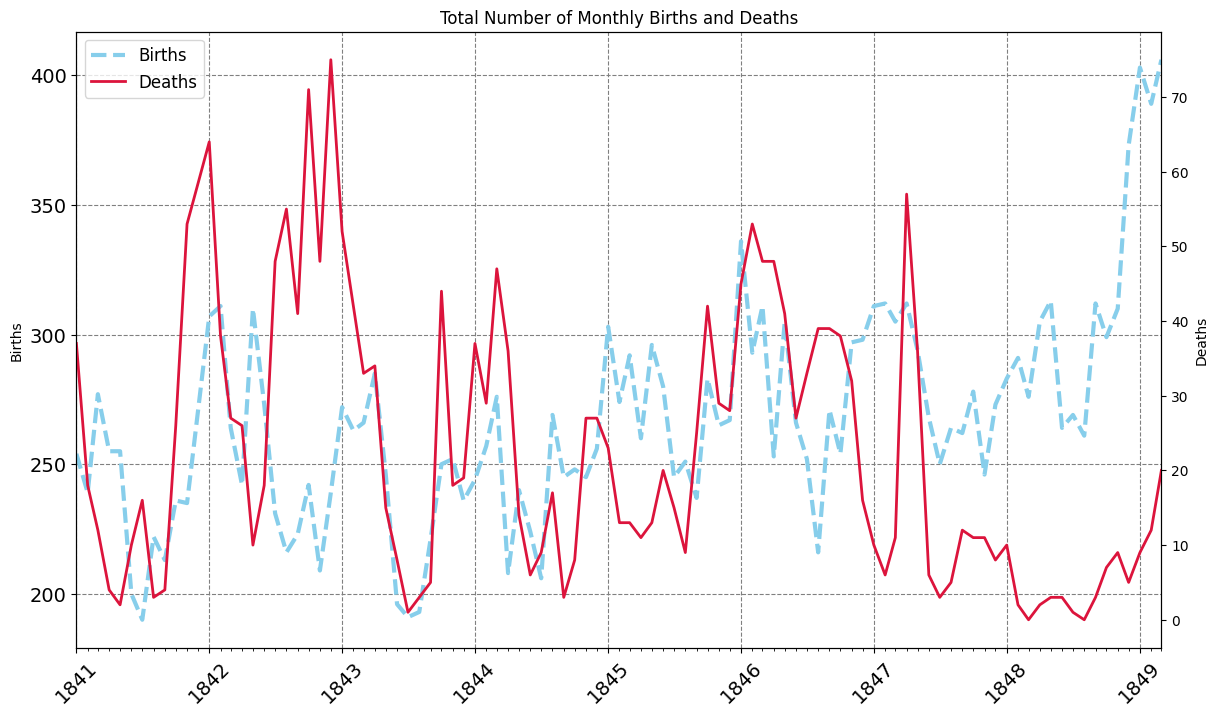

In [22]:
plt.figure(figsize=(14, 8))
plt.title('Total Number of Monthly Births and Deaths')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_xlim(df_monthly.date.min(), df_monthly.date.max())
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)
ax1.grid(color='grey', linestyle='--')
ax1.set_ylabel("Births")
ax2.set_ylabel("Deaths")

# Add labels for legend
line1 = ax1.plot(df_monthly.date, df_monthly.births, linewidth=3, color='skyblue', linestyle='--', label='Births')[0]
line2 = ax2.plot(df_monthly.date, df_monthly.deaths, linewidth=2, color='crimson', label='Deaths')[0]

# Show legend combining both
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper left', fontsize=12)

# The Yearly Data Split by Clinic

Now let's look at the annual data instead.

I can use plotly to create line charts of the births and deaths of the two different clinics at the Vienna General Hospital and answer the following questiions:
* Which clinic is bigger or more busy judging by the number of births?
* Has the hospital had more patients over time?
* What was the highest number of deaths recorded in clinic 1 and clinic 2?

In [23]:
px.line(df_yearly, x='year', y='births', color='clinic')

In [24]:
px.line(df_yearly, x='year', y='deaths', color='clinic')

From the Graphs we can see:


*   Clinic 1 was busier and had a higher number of customers over time, even if the growth of customers grew at around the same rate for both.
*   Clinic 1 had over 500 deaths in 1842 and Clinic 3 had approximately 200.

It seems clinic 2 is far more successful at keeping patients alive, however this stat may be misleading as it is not normalised for customer population.



### Calculate the Proportion of Deaths at Each Clinic

Now let me calculate the proportion of maternal deaths per clinic. That way we can compare like with like.
* I will first calculate the percentage of deaths for each row in the `df_yearly` DataFrame by adding a column called "pct_deaths".
* Calculate the average maternal death rate for clinic 1 and clinic 2 (i.e., the total number of deaths per the total number of births).
* Create another plotly line chart to see how the percentage varies year over year with the two different clinics.
* Which clinic has a higher proportion of deaths?
* What is the highest monthly death rate in clinic 1 compared to clinic 2?

#### We will work out the percentage of deaths for each row in the `df_yearly` DataFrame by adding a column called "pct_deaths".

In [25]:
df_yearly['pct_deaths']=(df_yearly.deaths/df_yearly.births) *100

In [26]:
df_yearly.head()

,year,births,deaths,clinic,pct_deaths
0,1841,3036,237,clinic 1,7.81
1,1842,3287,518,clinic 1,15.76
2,1843,3060,274,clinic 1,8.95
3,1844,3157,260,clinic 1,8.24
4,1845,3492,241,clinic 1,6.90


#### We can also calculate the average maternal mortality rate or MMR for clinic 1 and clinic 2 (i.e., the total number of deaths per the total number of births).


In [27]:
clinic1_avg = (df_yearly.deaths[df_yearly.clinic=='clinic 1'].sum()/df_yearly.births[df_yearly.clinic=='clinic 1'].sum())*100
clinic1_avg

np.float64(9.924159265542361)

In [28]:
clinic2_avg = (df_yearly.deaths[df_yearly.clinic=='clinic 2'].sum()/df_yearly.births[df_yearly.clinic=='clinic 2'].sum())*100
clinic2_avg

np.float64(3.8839862852003826)

In [29]:
df_yearly.groupby(['clinic']).agg({'pct_deaths':'mean'})

,pct_deaths
clinic,
clinic 1,9.85
clinic 2,4.04


**So now we can see that, after normalisation we can see that clinic 2 has less than half the MMR of clinic 1.**

#### To express this visually over time:

In [30]:
px.line(df_yearly, x='year', y='pct_deaths', color='clinic', title='Proportion of Yearly Deaths by Clinic', labels={'year': 'Year', 'pct_deaths': 'Maternal Mortality Rate'})

# Breakthrough

Dr. Semmelweis was an excellent data analyst and he asked the right questions. He noted that clinic two had a far lower MMR and started to note down the key differences in the clinics and their operations.

The hospital had two maternity clinics:

Clinic 1: Staffed by **doctors and medical students**

Clinic 2: Staffed by **midwives**

He noticed that maternal mortality (especially from puerperal fever) was much higher in Clinic 1 than in Clinic 2.

He analysed monthly mortality rates in both clinics.

Consistently, Clinic 1 had death rates of close to 10%, while Clinic 2 was much lower, often under 4%.

Over the course of his analysis he ruled out several other Factors:
Differences in ventilation, overcrowding, birth techniques — none explained the drastic difference. The rate of deaths did not increase even with growth of customer population over time.

*He also discovered that even women giving birth in the street had lower mortality than those in Clinic 1.*

**The Key Insight:
The breakthrough came when a colleague, Dr. Kolletschka, died from an infection after being accidentally cut during an autopsy.**

**Semmelweis realized that doctors in Clinic 1 were performing autopsies, then immediately examining pregnant women without washing their hands.**

***Midwives in Clinic 2 did not perform autopsies!***

# The Effect of Handwashing

Dr Semmelweis made handwashing obligatory in the summer of 1847. In fact, he ordered people to wash their hands with clorine rather than water in order to kill all bacteria. Let us quantify the significance of this practice.

In [31]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')

Let us now measure the impact of the changes by adding a new
* Add a column called "pct_deaths" to `df_monthly` that has the percentage of deaths per birth for each row.
* Create two subsets from the `df_monthly` data: before and after Dr Semmelweis ordered washing hand.
* Calculate the average death rate prior to June 1947.
* Calculate the average death rate after June 1947.

####Let us add a column called "pct_deaths" to `df_monthly` that has the percentage of deaths per birth for each row

In [32]:
df_monthly['pct_deaths'] = (df_monthly.deaths/df_monthly.births)*100


In [33]:
df_monthly_before = df_monthly[df_monthly.date < handwashing_start]
df_monthly_after = df_monthly[df_monthly.date >= handwashing_start]

In [34]:
(df_monthly_before.deaths.sum()/df_monthly_before.births.sum())*100

np.float64(10.52577793674314)

In [35]:
(df_monthly_after.deaths.sum()/df_monthly_after.births.sum())*100

np.float64(2.1531463229719483)

### Calculate a Rolling Average of the Death Rate

Here I am creating a DataFrame that has the 6 month rolling average death rate prior to mandatory handwashing.

In [36]:
roll_df = df_monthly_before.set_index('date')
roll_df = roll_df.rolling(window=6).mean()

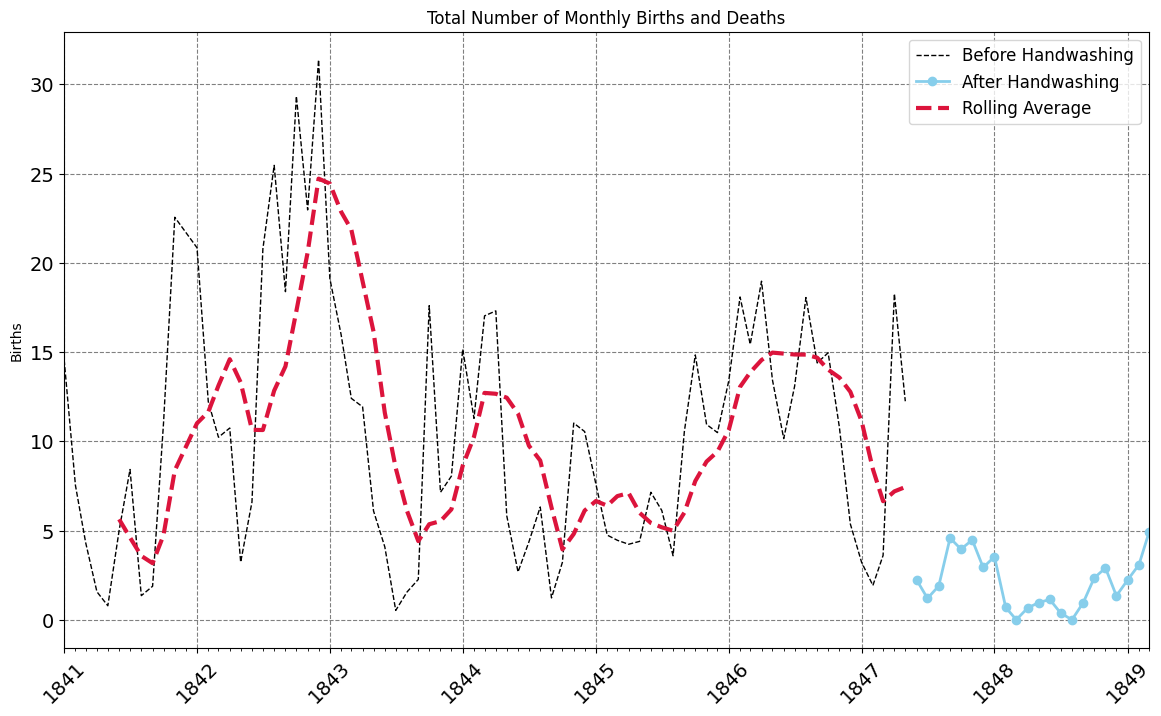

In [46]:
plt.figure(figsize = (14,8))
plt.title('Total Number of Monthly Births and Deaths')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
ax1=plt.gca()
ax1.set_xlim(df_monthly.date.min(), df_monthly.date.max())
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)
ax1.grid(color='grey', linestyle='--')
ax1.set_ylabel("Births")

ax1.plot(df_monthly_before.date, df_monthly_before.pct_deaths, linewidth = 1, color='black',linestyle='--',label='Before Handwashing')
ax1.plot(df_monthly_after.date, df_monthly_after.pct_deaths, linewidth = 2, color='skyblue', marker
         = 'o', label='After Handwashing')
ax1.plot(roll_df.index, roll_df.pct_deaths, linewidth = 3, color='crimson',linestyle='--', label = 'Rolling Average')

plt.legend(fontsize = 12, loc='upper right')

### Key Statistics:

In [55]:
before_dr = df_monthly_before.deaths.sum()/df_monthly_before.births.sum() *100
after_dr = df_monthly_after.deaths.sum()/df_monthly_after.births.sum() *100
print(f'The MMR before handwashing is {before_dr:.2f}%')
print(f'The MMR after handwashing is {after_dr:.2f}%')
print(f'The delta in MMR is {(before_dr - after_dr):.2f}% OR')
print(f'The chances of mortality was lowered by {(before_dr/after_dr):.2f} times')

The MMR before handwashing is 10.53%
The MMR after handwashing is 2.15%
The delta in MMR is 8.37% OR
The chances of mortality was lowered by 4.89 times


### Some More Visualisations

#### Box Plots

We can:
* Use [NumPy's `.where()` function](https://numpy.org/doc/stable/reference/generated/numpy.where.html) to add a column to `df_monthly` that shows if a particular date was before or after the start of handwashing.
* Then use plotly to create box plot of the data before and after handwashing.



In [56]:
df_monthly['B/A?'] = np.where(df_monthly.date > handwashing_start, 'After', 'Before')
df_monthly.tail()

,date,births,deaths,pct_deaths,B/A?
93,1848-11-01,310,9,2.90,After
94,1848-12-01,373,5,1.34,After
95,1849-01-01,403,9,2.23,After
96,1849-02-01,389,12,3.08,After
97,1849-03-01,406,20,4.93,After


In [57]:
box = px.box(df_monthly,
       x='B/A?',
       y='pct_deaths',
       color='B/A?',
       title='Death Rate Change Before and After Handwashing')
box.update_layout(xaxis_title = 'Before or After Handwashing discovery?',
                  yaxis_title = 'Death Rate')
box.show()

#### Histograms (With Box Plot for Comparison)

In [44]:
hist = px.histogram(df_monthly,
                    x='pct_deaths',
                    color='B/A?',
                    title='Death Rate Change Before and After Handwashing',
                    opacity =0.5,
                    barmode ='overlay',
                    histnorm='percent',
                    labels = {'x' : 'Percentage of Deaths', 'y':'Count'},
                    marginal ='box')
hist.show()

#### Kernel Density Estimate (KDE)

<Axes: xlabel='pct_deaths', ylabel='Density'>

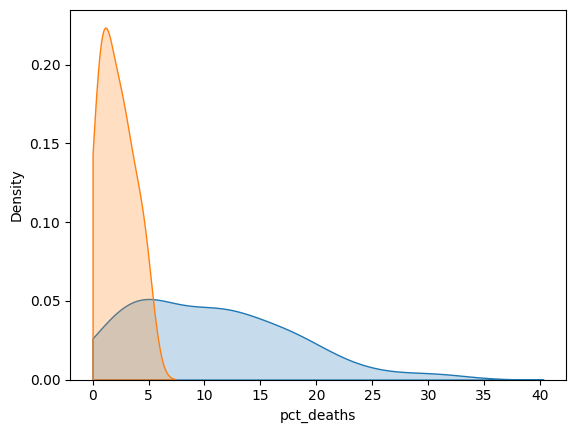

In [45]:
sns.kdeplot(data=df_monthly_before,
            x='pct_deaths',
            fill = 'True',
            clip=(0,100))
sns.kdeplot(data=df_monthly_after,
            x='pct_deaths',
            fill = 'True',
            clip=(0,100))

### Using a T-Test to Show Statistical Significance

**Context**:  We can use a t-test to determine if the differences in the means are statistically significant or purely due to chance.

The t-test does this by comparing the difference between group means relative to the variability in the data, helping us determine whether an observed effect, like reduced maternal mortality after handwashing, is likely due to the intervention or random fluctuations.



In [62]:
t_stat, p_value = stats.ttest_ind(a=df_monthly_before.pct_deaths,
                                  b=df_monthly_after.pct_deaths)
print(f'p-palue is {p_value:.10f}')
print(f't-statstic is {t_stat:.4}')

p-palue is 0.0000002985
t-statstic is 5.512


Using a two-sample t-test, we found a t-statistic of 5.512 and a p-value of 0.0000002985, which is far below the conventional significance level of 0.05. This indicates that the observed difference in means is highly statistically significant, and it is extremely unlikely that the reduction in MMR occurred by chance. These results provide strong evidence that handwashing had a substantial and positive impact on maternal health outcomes. It seems like no overstatement, that this may have been the single most signifcant discovery in medical science - on par with the discovery of penicillin.












<img src=https://i.imgur.com/rvjNVzQ.gif>